In [5]:
import numpy as np
import heapq
import pandas as pd
import matplotlib.pyplot as plt


data = np.loadtxt("CFB2017_scores.csv", delimiter = ',', dtype = int)
print(data.shape)
teams = []
with open('TeamNames.txt') as file:
    lines = file.readlines()
    for i in range(len(lines)):
        teams.append(lines[i][:-1])
len(teams)

(4200, 4)


763

In [2]:
# question a
M = np.zeros((763, 763))
for line in data:
    M[line[0] - 1][line[0] - 1] += line[1] / (line[1] + line[3]) + int(line[1] > line[3])
    M[line[2] - 1][line[2] - 1] += line[3] / (line[1] + line[3]) + int(line[1] < line[3])
    M[line[0] - 1][line[2] - 1] += line[3] / (line[1] + line[3]) + int(line[1] < line[3])
    M[line[2] - 1][line[0] - 1] += line[1] / (line[1] + line[3]) + int(line[1] > line[3])
M /= M.sum(axis = 1).reshape(1,-1).T
M

array([[ 0.28797319,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.3956207 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.50994756, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.58901975,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.81162167,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.56839673]])

In [4]:

w0 = np.zeros((1, 763)) + 1 / 763
w = w0
w1 = w.dot(M)

In [6]:
def nlarge(w, n):
    top = []
    res = heapq.nlargest(n, range(len(w[0])), w[0].take)
    for i in res:
        top.append(teams[i])
    return top

def iterate(w0, n, M):
    for i in range(n):
        w0 = w0.dot(M)
    return w0

In [8]:
top_teams = []
for n in [10, 100, 1000, 10000]:
    w = iterate(w0, n, M)
    top_teams.append(nlarge(w, 25))


In [9]:
top_teams_name = pd.DataFrame(top_teams).T
top_teams_name.columns = ["10", "100", "1000", "10000"]
top_teams_name

,10,100,1000,10000
0,MountUnion,MountUnion,Alabama,Alabama
1,MaryHardin-Baylor,Alabama,Georgia,Georgia
2,StFrancisIN,Georgia,MountUnion,OhioState
3,UW-Oshkosh,UW-Oshkosh,OhioState,Clemson
4,TAMU-Commerce,OhioState,Clemson,Oklahoma
5,BrockportSt,Clemson,Oklahoma,Wisconsin
6,NorthDakotaSt,Oklahoma,Wisconsin,CentralFlorida
7,Alabama,Wisconsin,CentralFlorida,Auburn
8,Morningside,CentralFlorida,Auburn,PennState
9,Georgia,MaryHardin-Baylor,PennState,NotreDame


In [97]:
# question b
# find the first eigen vector
index = np.argsort(v)
print("first eigen value's index = {}".format(index[-1]))
u = p[:,index[-1]]
omega = (u / u.sum()).reshape(1, -1)

first eigen value's index = 3


In [95]:
y = []
w = w0
for i in range(10000):
    w = w.dot(M)
    y.append(abs(w - omega).sum())
    

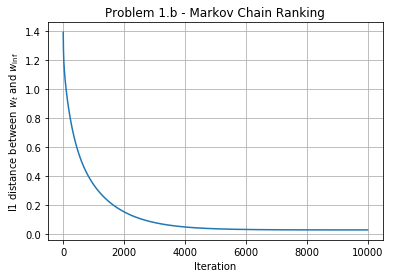

In [101]:
# plot steps
plt.plot(range(10000), y)
plt.grid("True")
plt.xlabel("Iteration")
plt.ylabel("l1 distance between $w_t$ and $w_\inf$")
plt.title("Problem 1.b - Markov Chain Ranking")
plt.savefig("P1_b", dpi = 600)
plt.show()